In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:


import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
tf.__version__

'2.6.4'

In [4]:
train_directory="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
#test_directory = ""

In [5]:
img_height = img_width = 256
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_directory,
  validation_split=0.2,
  class_names=["NORMAL","PNEUMONIA"],  
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


2022-10-07 01:09:58.731244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 01:09:58.829456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 01:09:58.830201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 01:09:58.833026: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


2022-10-07 01:10:02.171629: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


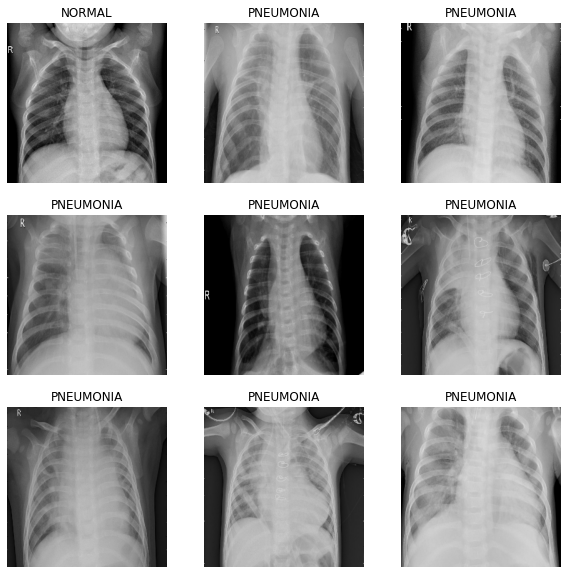

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
num_classes = len(class_names)
print(num_classes)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

2


In [10]:
#interpreter.get_signature_list()

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs=8
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/8


2022-10-07 01:10:08.170333: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


131/131 [==============================] - 54s 339ms/step - loss: 0.2850 - accuracy: 0.8754 - val_loss: 0.1267 - val_accuracy: 0.9588
Epoch 2/8
131/131 [==============================] - 34s 247ms/step - loss: 0.1128 - accuracy: 0.9602 - val_loss: 0.0983 - val_accuracy: 0.9664
Epoch 3/8
131/131 [==============================] - 33s 242ms/step - loss: 0.1009 - accuracy: 0.9595 - val_loss: 0.0749 - val_accuracy: 0.9760
Epoch 4/8
131/131 [==============================] - 33s 243ms/step - loss: 0.0600 - accuracy: 0.9777 - val_loss: 0.0600 - val_accuracy: 0.9818
Epoch 5/8
131/131 [==============================] - 33s 243ms/step - loss: 0.0494 - accuracy: 0.9813 - val_loss: 0.0662 - val_accuracy: 0.9789
Epoch 6/8
131/131 [==============================] - 34s 247ms/step - loss: 0.0329 - accuracy: 0.9880 - val_loss: 0.0789 - val_accuracy: 0.9779
Epoch 7/8
131/131 [==============================] - 33s 244ms/step - loss: 0.0353 - accuracy: 0.9878 - val_loss: 0.0600 - val_accuracy: 0.9818
Ep

In [13]:

# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        print(layer.name)
        continue

rescaling
max_pooling2d
max_pooling2d_1
max_pooling2d_2
flatten
dense
dense_1


In [14]:

# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

dense_1 (128, 2)


In [15]:
# from keras.applications.vgg16 import VGG16
# from matplotlib import pyplot
# # load the model
# model = VGG16()
# # summarize filter shapes
# for layer in model.layers:
#     # check for convolutional layer
#     if 'conv' not in layer.name:
#         continue
#     # get filter weights
#     filters, biases = layer.get_weights()
#     print(layer.name, filters.shape)

In [16]:

# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [17]:

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [18]:

# # plot first few filters
# n_filters, ix = 6, 1
# for i in range(n_filters):
#     # get the filter
#     f = filters[:, :, :, i]
#     # plot each channel separately
#     for j in range(3):
#         # specify subplot and turn of axis
#         ax = pyplot.subplot(n_filters, 3, ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         # plot filter channel in grayscale
#         pyplot.imshow(f[:, :, j], cmap='gray')
#         ix += 1
# # show the figure
# pyplot.show()

In [19]:

# # plot feature map of first conv layer for given image
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import Model
# from matplotlib import pyplot
# from numpy import expand_dims
# # load the model
# model = VGG16()
# # redefine model to output right after the first hidden layer
# model = Model(inputs=model.inputs, outputs=model.layers[1].output)
# model.summary()
# # load the image with the required shape
# img = load_img('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg', target_size=(224, 224))
# # convert the image to an array
# img = img_to_array(img)
# # expand dimensions so that it represents a single 'sample'
# img = expand_dims(img, axis=0)
# # prepare the image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img)
# # get feature map for first hidden layer
# feature_maps = model.predict(img)
# # plot all 64 maps in an 8x8 squares
# square = 8
# ix = 1
# for _ in range(square):
#     for _ in range(square):
#         # specify subplot and turn of axis
#         ax = pyplot.subplot(square, square, ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         # plot filter channel in grayscale
#         pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
#         ix += 1
# # show the figure
# pyplot.show()

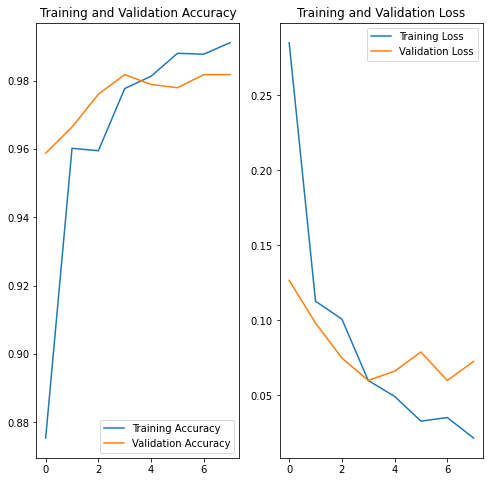

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

In [22]:
# import tempfile

# #MODEL_DIR = tempfile.gettempdir()
# MODEL_DIR = "/kaggle/working"
# version = 3
# export_path = os.path.join(MODEL_DIR, str(version))
# print('export_path = {}\n'.format(export_path))

# tf.keras.models.save_model(
#     model,
#     export_path,
#     overwrite=True,
#     include_optimizer=True,
#     save_format="h5",
#     signatures=None,
#     options=None
# )

# print('\nSaved model:')
# !ls -l {export_path}

In [23]:
# import tempfile

# #MODEL_DIR = tempfile.gettempdir()
# export_path = "/kaggle/working"
# version = 9
# #export_path = os.path.join( str(version))
# print('export_path = {}\n'.format(export_path))

# tf.keras.models.save_model(
#     model,
#     '9',
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None
# )

# print('\nSaved model:')
# !ls -l {export_path}

In [24]:
#!saved_model_cli show --dir {export_path} --all

In [25]:
# !tar -czvf pModel9.tar.gz  /kaggle/working/

# from IPython.display import FileLink

# FileLink(r'pModel9.tar.gz')

In [26]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the model.
# with open('model2.tflite', 'wb') as f:
#     f.write(tflite_model)

In [27]:
# TF_MODEL_FILE_PATH = 'model2.tflite' # The default path to the saved TensorFlow Lite model

# interpreter = tf.lite.Interpreter(model_path="/kaggle/working/model2.tflite")

In [28]:
path_normal = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0652-0001-0002.jpeg"
path_positive = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg"
img = tf.keras.utils.load_img(
    path_positive, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a ba
print(img_array)
print(img_array.shape)
predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])
print(np.argmax(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

tf.Tensor(
[[[[249. 249. 249.]
   [  2.   2.   2.]
   [ 72.  72.  72.]
   ...
   [ 62.  62.  62.]
   [ 50.  50.  50.]
   [ 40.  40.  40.]]

  [[  4.   4.   4.]
   [  1.   1.   1.]
   [  2.   2.   2.]
   ...
   [ 64.  64.  64.]
   [ 48.  48.  48.]
   [ 40.  40.  40.]]

  [[  7.   7.   7.]
   [  3.   3.   3.]
   [ 66.  66.  66.]
   ...
   [ 55.  55.  55.]
   [ 47.  47.  47.]
   [ 38.  38.  38.]]

  ...

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[  7.   7.   7.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]]], shape=(1, 256, 256, 3), dtype=float32)
(1, 256, 256, 3)
[[ 3.7762804 -4.006624 ]]
0
This image most likely belongs to NORMAL with a 99.96 percent confidence.


In [29]:
#!rm -rf /kaggle/working/*

In [30]:
import tempfile

#MODEL_DIR = tempfile.gettempdir()
MODEL_DIR = "/kaggle/working"
version = 11
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    signatures=None,
    options=None
)

print('\nSaved model:')


!tar -czvf pModel11.tar.gz  /kaggle/working/

from IPython.display import FileLink

FileLink(r'pModel11.tar.gz')

export_path = /kaggle/working/11



2022-10-07 01:15:19.411531: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.



Saved model:
tar: Removing leading `/' from member names
/kaggle/working/
/kaggle/working/11/
/kaggle/working/11/variables/
/kaggle/working/11/variables/variables.index
/kaggle/working/11/variables/variables.data-00000-of-00001
/kaggle/working/11/assets/
/kaggle/working/11/keras_metadata.pb
/kaggle/working/11/saved_model.pb
/kaggle/working/__notebook__.ipynb
tar: /kaggle/working: file changed as we read it


/kaggle/working/pModel11.tar.gz

In [31]:
!sudo apt tensorflow-model-server



E: Invalid operation tensorflow-model-server


In [32]:
!nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=pmodel \
  --model_base_path="/kaggle/working" >server.log 2>&1

In [33]:
!tail server.log

nohup: ignoring input
nohup: failed to run command 'tensorflow_model_server': No such file or directory


In [34]:
model.save("Save_model.h5")